In [14]:
import tensorflow as tf
import glob

from tensorflow.keras import Sequential,Model
from tensorflow.keras.layers import Dense,Dropout,Flatten,BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
train_data_dir=('dataset/training')
validation_data_dir=('dataset/testing')
img_width=64
img_height=64
batch_size=500

In [16]:
datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(directory=train_data_dir,
                                              target_size = (img_width, img_height),
                                              classes=['Bacterial_leaf_blight','Brown_spot','Health','Leaf_smut'],
                                              class_mode = 'binary',
                                              batch_size=batch_size)

validation_generator = datagen.flow_from_directory(directory=validation_data_dir,
                                              target_size = (img_width, img_height),
                                              classes=['Bacterial_leaf_blight','Brown_spot','Health','Leaf_smut'],
                                              class_mode = 'binary',
                                              batch_size=batch_size)

Found 12800 images belonging to 4 classes.
Found 3200 images belonging to 4 classes.


In [17]:
vgg_arch=VGG16(input_shape=(img_width,img_height,3),weights="imagenet",include_top=False)

In [18]:
for layers in vgg_arch.layers:
  layers.trainable=False

In [19]:
model=Sequential()
model.add(vgg_arch)
model.add(Flatten())
model.add(Dense(128,activation='relu',))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(1,activation="softmax"))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               262272    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 14,977,601
Trainable params: 262,657
Non-trainable params: 14,714,944
____________________________________

In [21]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [23]:
history=model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator), epochs = 30, 
                              validation_data=validation_generator, validation_steps=len(validation_generator)
                              , verbose = 1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 26 steps, validate for 7 steps
Epoch 1/30
 1/26 [>.............................] - ETA: 37s

UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node sequential_1/vgg16/block1_conv1/Conv2D (defined at <ipython-input-23-83b2a305e7d2>:3) ]] [Op:__inference_distributed_function_4117]

Function call stack:
distributed_function


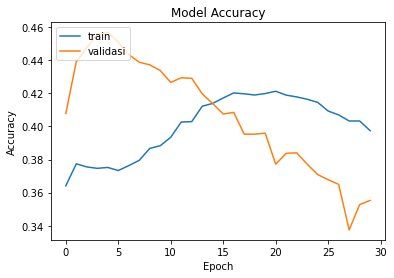

In [74]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validasi'], loc='upper left')
plt.show()